<a href="https://colab.research.google.com/github/Adhira-Deogade/INFO-7374---Assignment-3/blob/master/Expt1_BoW_KerasModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import division
from __future__ import print_function

In [2]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 1.13.1


Using TensorFlow backend.


In [3]:
ls

cleanedfinancial_data.csv  sample_data/


In [0]:
from google.colab import files

In [0]:
upload = files.upload()

In [0]:
## Our file is present, just import it

In [0]:
dataset = pd.read_csv("cleanedfinancial_data.csv")

In [0]:
dataset.head()

In [0]:
dataset.drop(columns="Unnamed: 0", inplace=True)

Value counts

In [0]:
dataset.sentiment.value_counts()

**Data is imbalanced, therefore, we first build a logistic regression model as our base model**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
dataset.shape[0]

In [0]:
dataset.iloc[2,1]

In [8]:
import re
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt 

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

#spell correction
# import autocorrect
# from autocorrect. import spell

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
dataset.shape

In [0]:
data = []

In [0]:
for i in range(dataset.shape[0]):
    sms = dataset.iloc[i, 1]

    # remove non alphabatic characters
    sms = re.sub('[^A-Za-z]', ' ', sms)

    # make words lowercase, because Go and go will be considered as two words
    sms = sms.lower()

    # tokenising
    tokenized_sms = wt(sms)

    # remove stop words and stemming
 
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('english')):
            sms_processed.append(stemmer.stem(word))

    sms_text = " ".join(sms_processed)
    data.append(sms_text)

In [11]:
len(data)

1649

In [0]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = matrix.fit_transform(data).toarray()
y = dataset.iloc[:, 0]


In [0]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
# Importing the libraries
import numpy as np
import re
import pickle 
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
ls

cleanedfinancial_data.csv  sample_data/


In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt

In [18]:
y.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [21]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 1.13.1


In [0]:

train_posts = X_train
train_tags =y_train

test_posts = X_test
test_tags = y_test

In [0]:
max_words = 2000

In [0]:

# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [25]:
y_train

array([2, 2, 2, ..., 2, 0, 2])

In [0]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [27]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [0]:
x_train = X_train
x_test = X_test

In [29]:

# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1319, 1949)
x_test shape: (330, 1949)
y_train shape: (1319, 3)
y_test shape: (330, 3)


In [0]:
batch_size = 128
epochs = 5

In [0]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(1949,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 1187 samples, validate on 132 samples
Epoch 1/5
1187/1187 [==============================] - 3s 3ms/step - loss: 1.0040 - acc: 0.5560 - val_loss: 0.9951 - val_acc: 0.6212
Epoch 2/5
1187/1187 [==============================] - 0s 70us/step - loss: 0.7330 - acc: 0.7709 - val_loss: 0.9106 - val_acc: 0.7045
Epoch 3/5
1187/1187 [==============================] - 0s 69us/step - loss: 0.5654 - acc: 0.8408 - val_loss: 0.8424 - val_acc: 0.6894
Epoch 4/5
1187/1187 [==============================] - 0s 67us/step - loss: 0.4419 - acc: 0.9014 - val_loss: 0.8190 - val_acc: 0.7045
Epoch 5/5
1187/1187 [==============================] - 0s 63us/step - loss: 0.3415 - acc: 0.9233 - val_loss: 0.8476 - val_acc: 0.7197


In [35]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

330/330 [==============================] - 0s 69us/step
Test score: 0.7522955161152464
Test accuracy: 0.6878787820989435


In [0]:

y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [0]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [0]:
text_labels = encoder.classes_ 

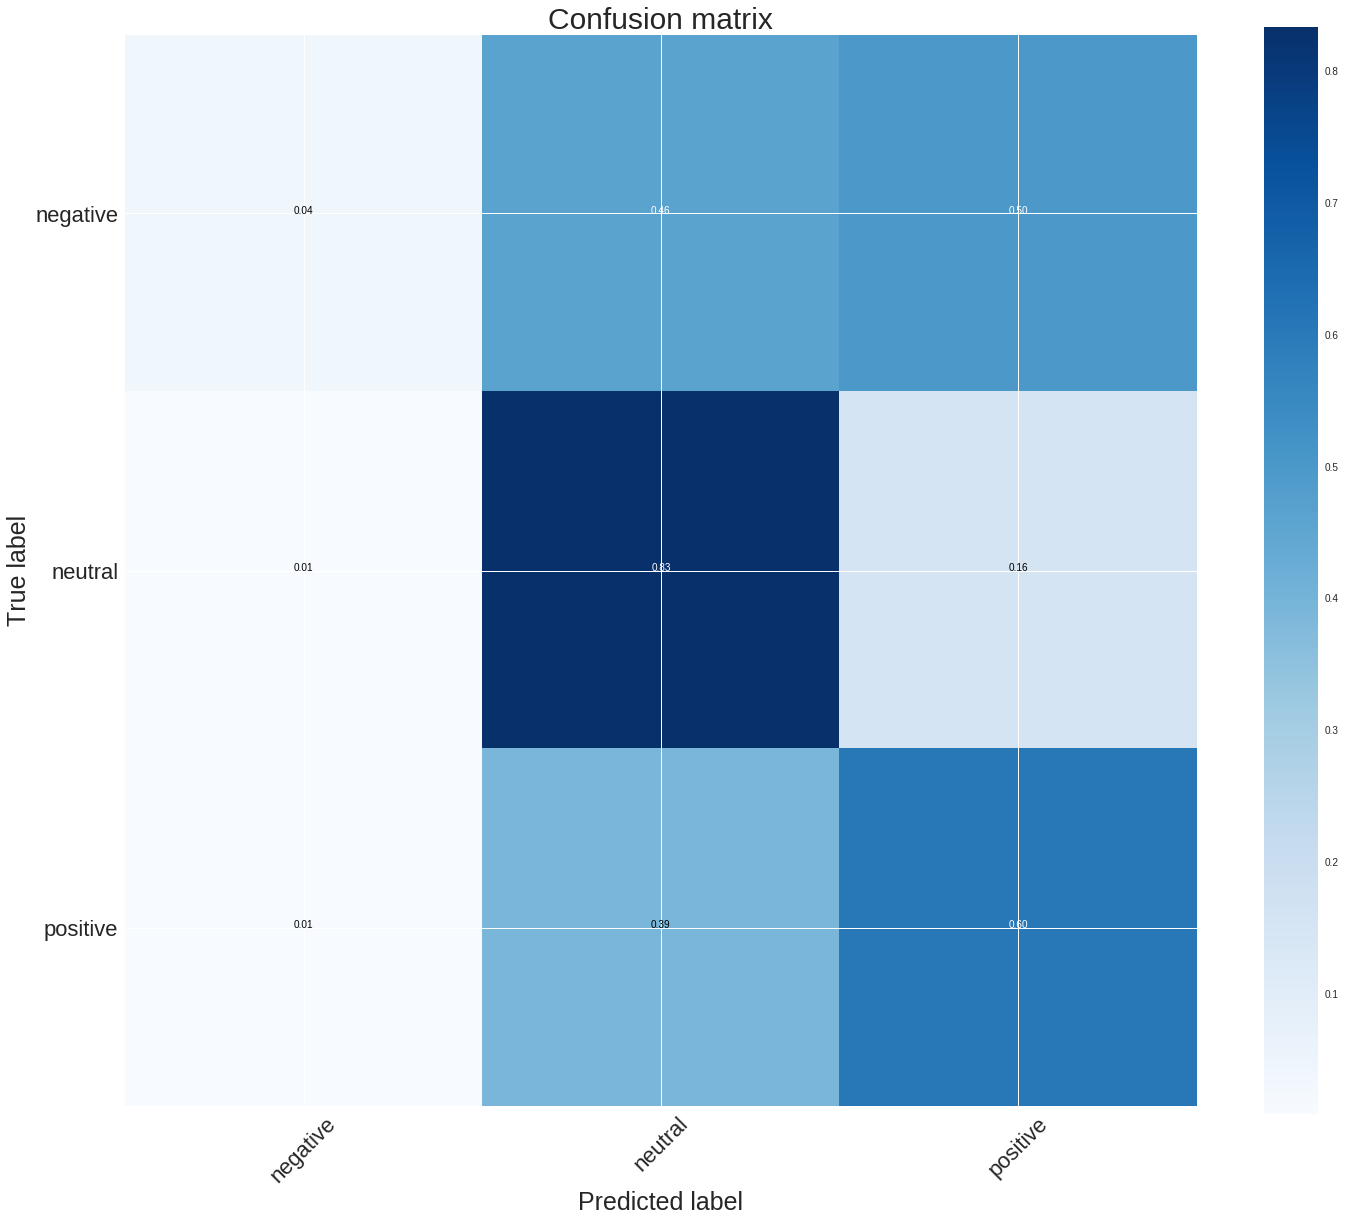

In [39]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [0]:
from sklearn.metrics import f1_score

In [41]:
f1_score(y_test_1d, y_pred_1d, average='macro')

0.4861092124250019